In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import warnings
warnings.filterwarnings('ignore')

In [45]:
#import Scikit Learn modules
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC

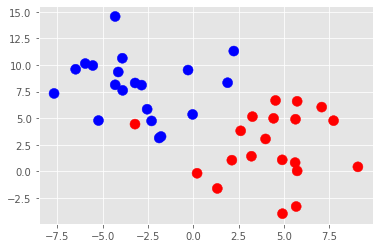

In [46]:
X, y = make_blobs(n_samples=40, centers=2, random_state=42, cluster_std=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr")
plt.show()

In [48]:
y

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [4]:
# Support vector machine linear classifier
model = SVC(kernel='linear')
model.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [5]:
# Plot the decision boundaries
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()
print(x_min, x_max, y_min, y_max)

-7.683951120591849 9.07356097045265 -3.989537059861947 14.571120681725134


In [6]:
# Store decision boundaries in mesh grid
XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
print(XX)

[[-7.68395112 -7.68395112 -7.68395112 -7.68395112 -7.68395112 -7.68395112
  -7.68395112 -7.68395112 -7.68395112 -7.68395112 -7.68395112 -7.68395112
  -7.68395112 -7.68395112 -7.68395112 -7.68395112 -7.68395112 -7.68395112
  -7.68395112]
 [-6.68395112 -6.68395112 -6.68395112 -6.68395112 -6.68395112 -6.68395112
  -6.68395112 -6.68395112 -6.68395112 -6.68395112 -6.68395112 -6.68395112
  -6.68395112 -6.68395112 -6.68395112 -6.68395112 -6.68395112 -6.68395112
  -6.68395112]
 [-5.68395112 -5.68395112 -5.68395112 -5.68395112 -5.68395112 -5.68395112
  -5.68395112 -5.68395112 -5.68395112 -5.68395112 -5.68395112 -5.68395112
  -5.68395112 -5.68395112 -5.68395112 -5.68395112 -5.68395112 -5.68395112
  -5.68395112]
 [-4.68395112 -4.68395112 -4.68395112 -4.68395112 -4.68395112 -4.68395112
  -4.68395112 -4.68395112 -4.68395112 -4.68395112 -4.68395112 -4.68395112
  -4.68395112 -4.68395112 -4.68395112 -4.68395112 -4.68395112 -4.68395112
  -4.68395112]
 [-3.68395112 -3.68395112 -3.68395112 -3.68395112 -3

In [50]:
# Use the decision_function function to identify sides of the hyperplane
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])
print(Z.shape)

(48,)


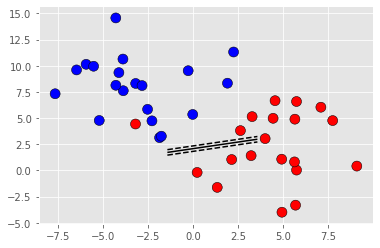

In [51]:
# Put the result into a color plot
Z = Z.reshape(XX.shape)
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()

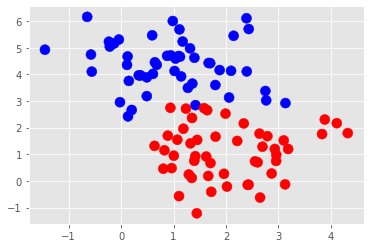

In [52]:
# Demonstrate that support vectors will sometimes cross the margin
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=.95)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr")
plt.show()

In [10]:
# Split data into training and testing
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
# Fit to the training data and validate with the test data
model = SVC(kernel='linear')
clf=model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0])

In [42]:
# Plot the decision boundaries
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z.shape

(48,)

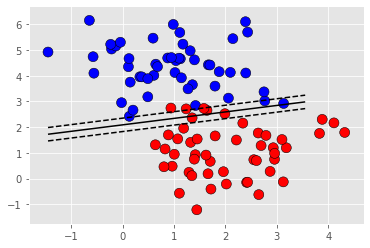

In [21]:
np.mgrid[x_min:x_max, y_min:y_max]

array([[[-1.44907025, -1.44907025, -1.44907025, -1.44907025,
         -1.44907025, -1.44907025, -1.44907025, -1.44907025],
        [-0.44907025, -0.44907025, -0.44907025, -0.44907025,
         -0.44907025, -0.44907025, -0.44907025, -0.44907025],
        [ 0.55092975,  0.55092975,  0.55092975,  0.55092975,
          0.55092975,  0.55092975,  0.55092975,  0.55092975],
        [ 1.55092975,  1.55092975,  1.55092975,  1.55092975,
          1.55092975,  1.55092975,  1.55092975,  1.55092975],
        [ 2.55092975,  2.55092975,  2.55092975,  2.55092975,
          2.55092975,  2.55092975,  2.55092975,  2.55092975],
        [ 3.55092975,  3.55092975,  3.55092975,  3.55092975,
          3.55092975,  3.55092975,  3.55092975,  3.55092975]],

       [[-1.21456933, -0.21456933,  0.78543067,  1.78543067,
          2.78543067,  3.78543067,  4.78543067,  5.78543067],
        [-1.21456933, -0.21456933,  0.78543067,  1.78543067,
          2.78543067,  3.78543067,  4.78543067,  5.78543067],
        [-1.21

In [13]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

              precision    recall  f1-score   support

        blue       0.83      1.00      0.91        10
         red       1.00      0.87      0.93        15

    accuracy                           0.92        25
   macro avg       0.92      0.93      0.92        25
weighted avg       0.93      0.92      0.92        25



In [14]:
c_matrix=pd.DataFrame(confusion_matrix(y_test, predictions), columns=['Predicted_No', 'Predicted_Yes'])
c_matrix.index=['Actual_No', 'Actual_Yes']
c_matrix

,Predicted_No,Predicted_Yes
Actual_No,10,0
Actual_Yes,2,13


In [26]:
print(x_min, x_max, y_min, y_max)

-1.4490702464958796 4.319255057553622 -1.2145693346752684 6.15702395291859


In [43]:
len(XX)#.shape

6

In [38]:
Z.shape

(6, 8)

In [32]:
np.c_[XX.ravel(), YY.ravel()].shape

(48, 2)